<a href="https://colab.research.google.com/github/xuanxixi/NLP_Lab/blob/main/Lab2_Xi_Xuan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Lab 2024 - LAB2: Morphology
In this lab we introduce the topics of morphology and also get some hands on practice.

To complete this lab you need to read the material associated to this lab; the following two book chapters (also available in the Moodle, under the `Lab2` tab):

- Christine P. Chai (2022).Comparison of text preprocessing methods

- Corpus annotation: Hovy, Oxford Handbook of CL, 2nd editionFile (link here)
- Text segmentation: Mikheev, Oxford Handbook of CL, 2nd editionFile (ADD link)

In this lab we will use Python's popular nltk (Natural Language Toolkit) and matplotlib for visualizations.

## **Overview:**

Morphology is the study of the structure of words and how they are formed from morphemes, the smallest units of meaning. In Natural Language Processing, understanding morphology is crucial for tasks such as text analysis, machine translation, and sentiment analysis.


> _Morphology is the study of the structure of words and how they are formed by combining smaller units of linguistic information called *morphemes*. Historically, most NLP applications, if not all, needed to computationally process the words in a language before any more complex processing could be done --- especially when dealing with morphologically rich languages. After a short overview of basic concepts, to support your readings, in this lab we will present some computational methods to morphology centering in two-level morphology and cascaded-rules_ (Oflazer, Oxford Handbook of CL - edited to match contemporary NLP)



## **Part 1: Introduction, Definitions and Motivation**

### Key Concepts

1. **Word-form, form**: A concrete word as it occurs in real speech/text -- for computational purposes, for most languages a word is a string of characters separated with spaces in writing (e.g. not always the case for chinese, japanese, etc.)

2. **Lemmas**: A distinguished form from a set of morphologically related forms, chosen by convention (e.g., nominative, singular for nouns and infinitive for verbs) to represent that set. E.g., the lemma for “running” is “run.”

    - For evey form there is a corresponding lemma. Also called cannonical/base/dictionary/citation form.

3. **Lexemes**: An abstract entity, a dictionary word. It can be thought of as a set of word-forms. Every form belongs to one lexeme, referred to by its lemma. E.g., “runs,” “running,” “ran” are form of the same lexeme “run”; "run" is traditionally used as the lemma denoting this lexeme.

4. **Paradigms**: Sets of related word forms that share a common grammatical function, they all belong to the same lexeme. For example, verb conjugations like “I run,” “he runs,” “we ran.”

    **Paradigm of "insula"**

|Case       | Singular  |  Plural  |
|-----------|-----------|----------|
|Nominative | insula    |insulae   |
|Genitive   | insulae   |insularum |
|Dative     |insulae    | insulis  |
|Accusative | insulam   |insulas   |
|Ablative   | insula    | insulis  |
|Vocative   | insula    |insulae   |


### Exercise 1. Chai (2022)
Based on your understanding of the research article "Comparison of text prerocessing methods" answer the followng quesitons.

**Q1.** Describe tokenization, stemming, and lemmatization. How do these methods differ in their approach to text preprocessing, and in what situations might each be most beneficial?

In [ ]:
# Tokenization
# Tokenization is the process of splitting text into individual units called tokens, which could be words, phrases, or even sentences, depending on the level of tokenization. In word-level tokenization, for instance, a sentence like “I am learning NLP” would be split into tokens: “I,” “am,” “learning,” and “NLP.” Tokenization is essential because most natural language processing (NLP) tasks analyze text at the token level, allowing models to process sequences of meaningful units rather than entire strings of characters.
# Best Used When: Tokenization is generally the first step in any text processing pipeline. It’s crucial for all NLP tasks, especially for building vocabularies, training word embeddings, or implementing text analysis tasks where word boundaries need to be defined.

# Stemming
# Stemming reduces words to their base or root form, known as the stem. This process involves chopping off suffixes or prefixes in a somewhat crude manner. For example, stemming would reduce "running," "runs," and "runner" to the root "run." However, stemming doesn’t consider whether the resulting stem is a valid word; it simply removes the common endings based on predefined rules, often leading to non-standard root forms (e.g., "studies" becomes "studi").
# Best Used When: Stemming is useful in applications where exact word forms aren’t as important, such as search engines or information retrieval systems, where retrieving any word form related to the stem is advantageous. It’s also efficient and computationally less intensive.

# Lemmatization
# Lemmatization, like stemming, reduces words to their base form, known as the lemma. However, unlike stemming, it ensures that the result is an actual word by considering the context and morphological structure of the word. For instance, "running" would be lemmatized to "run," and "better" would be lemmatized to "good" (unlike stemming, which might simply reduce it to "bett"). Lemmatization is more accurate but computationally intensive as it requires a vocabulary or dictionary.
# Best Used When: Lemmatization is ideal in applications requiring higher precision and linguistic accuracy, such as machine translation, sentiment analysis, or any task where the meaning of words in context is crucial.

# Key Differences
# Tokenization breaks down text into units.
# Stemming reduces words to their stems without ensuring meaningful output.
# Lemmatization reduces words to their dictionary base forms, ensuring linguistic accuracy.
# Each method has specific strengths. Tokenization is foundational, stemming is fast and effective for broad matches, and lemmatization is accurate but requires more resources. The choice depends on the goals of the NLP task and the balance between accuracy and computational resources.

**Q2.** Discuss how removing punctuation or stopwords might impact different NLP tasks, such as sentiment analysis or topic modeling. Why might these preprocessing steps enhance certain NLP applications but hinder others?

In [ ]:
# Removing Punctuation
# Sentiment Analysis: In sentiment analysis, punctuation can convey emotional emphasis, especially in social media posts or customer reviews. For instance, exclamation marks (“I love this!”) can amplify positive sentiment, while ellipses or question marks might add nuance or ambiguity (“Really…?”). Removing punctuation in this context might lead to a loss of these subtle cues, potentially reducing the model’s accuracy in interpreting sentiment.

# Topic Modeling: In topic modeling, punctuation is generally not informative and can be safely removed to focus on the main content words that define topics. Here, punctuation removal usually enhances performance, helping algorithms like LDA (Latent Dirichlet Allocation) to focus on words and phrases relevant to topic identification without being distracted by extraneous symbols.

# Removing Stopwords
# Sentiment Analysis: Stopwords are common words like “is,” “and,” or “the,” which often carry minimal semantic weight in determining the sentiment. Removing them can help reduce noise, making it easier for models to focus on sentiment-bearing words (e.g., “happy,” “terrible”). However, some stopwords can add context essential for nuanced sentiment interpretation. For example, “not” in “not good” is crucial for understanding the negative sentiment. Removing it would invert the meaning, so careful handling of negations and certain impactful stopwords is necessary in sentiment analysis.

# Topic Modeling: Stopwords generally don’t contribute meaningful information to topic modeling and can dilute the focus on content-specific words. Removing them improves topic coherence by allowing the model to prioritize more significant terms that characterize specific topics. This preprocessing step is usually beneficial in topic modeling, as it reduces dimensionality and helps algorithms find clearer distinctions between topics.

# Why These Steps Might Help or Hinder NLP Applications
# Enhanced Clarity: In applications like topic modeling, removing punctuation and stopwords refines the focus on content-specific words, reducing noise and improving model efficiency and interpretability.

# Loss of Context or Nuance: In sentiment analysis, removing punctuation or important stopwords can strip away nuances that convey emotional tone or modify meaning (e.g., negations like "not"). This can lead to misinterpretation, as the context provided by punctuation and certain stopwords is essential to capturing sentiment accurately.

# Summary
# Helpful: Punctuation and stopword removal typically benefit tasks like topic modeling, where the primary goal is to extract the main ideas without distraction from common words or symbols.
# Potentially Detrimental: In tasks such as sentiment analysis, where tone, negation, and subtle emphasis matter, removing these elements can hinder model performance by losing essential contextual or affective information.

**Q3.** Many fields (e.g., biomedical or legal texts) have specific terminology and formatting. How would you tailor preprocessing for a specialized corpus to avoid data loss while still preparing the text for analysis?

In [ ]:
# When working with specialized corpora, such as biomedical or legal texts, it’s crucial to tailor preprocessing steps to avoid data loss while preparing the text for analysis. Below are tailored strategies to retain domain-specific information.

# 1. Custom Stopword Lists
# General-purpose stopwords may remove words essential to a specific field. For example:

# Biomedical Texts: Words like “dose,” “gene,” or “cell” are critical for understanding content.
# Legal Texts: Common legal terms such as “court,” “law,” or “section” hold significant meaning.
# Solution: Use a custom stopword list that retains domain-specific terms essential to the field while filtering out other irrelevant common words.

# 2. Handling Domain-Specific Terms and Phrases
# Technical terms and multi-word phrases are common in specialized fields and should be preserved as single units. For instance:

# Biomedical Texts: Multi-word terms like “myocardial infarction” or abbreviations like “COVID-19” must remain intact.
# Legal Texts: Terms like “summary judgment” or “burden of proof” should not be split.
# Solution: Use domain-aware tokenization to ensure multi-word terms and abbreviations remain as single units.

# 3. Entity Recognition and Retention
# Named entities in specialized fields, such as chemical compounds or legal citations, are crucial for context and should be preserved.

# Biomedical Texts: Entities like drug names, genes, and diseases are vital.
# Legal Texts: Case citations, statutes, and legal doctrines should be retained.
# Solution: Apply Named Entity Recognition (NER) specific to the domain to identify and preserve important entities.

# 4. Custom Lemmatization and Stemming
# Unique inflections in specialized terminology may require customized lemmatization or stemming.

# Biomedical Texts: Terms like “immunizations” should stem to “immunization” specifically.
# Legal Texts: Words like “appeals,” “appealed,” and “appealing” should reduce to “appeal.”
# Solution: Use domain-specific lemmatizers or create custom dictionaries that understand relationships between specialized terms.

# 5. Punctuation and Formatting Considerations
# Punctuation and formatting often convey structure in specialized texts.

# Biomedical Texts: Symbols in formulas (e.g., “NaCl”) or p-values are important.
# Legal Texts: Section symbols (§) or punctuation in clauses convey legal hierarchy.
# Solution: Apply selective punctuation handling, retaining essential symbols and structures.

# 6. Context-Sensitive Preprocessing
# Words and phrases may have domain-specific meanings.

# Biomedical Texts: Terms like “significant” or “control” have specific meanings in experiments.
# Legal Texts: Words like “party” or “interest” hold unique legal interpretations.
# Solution: Use domain-specific glossaries or embeddings to capture terms’ precise meanings within their field context.

**Q4.** With the advancement of pre-trained language models like BERT, why is text preprocessing still considered necessary? What preprocessing steps are crucial for leveraging these models, and how might excessive or inadequate preprocessing affect model performance?

In [ ]:
# Why Text Preprocessing is Still Necessary with Pre-trained Language Models like BERT

# Pre-trained language models like BERT have significantly advanced NLP by providing deep contextual embeddings and handling a wide range of linguistic variations. However, preprocessing remains essential to optimize performance and ensure that these models are trained and fine-tuned on clean, relevant data. Preprocessing helps standardize input, reduce noise, and improve the efficiency of model training and inference, all of which are critical for maximizing the model's potential.

# Crucial Preprocessing Steps for Leveraging Pre-trained Models
# Tokenization: Models like BERT use subword tokenization (e.g., WordPiece), which breaks down words into meaningful subword units. Proper tokenization is crucial for BERT to handle variations, rare words, and morphology without losing semantic meaning. Adhering to the specific tokenization scheme of the model ensures that input is compatible and maximizes the information captured in embeddings.

# Lowercasing (Optional): For models that are cased, maintaining capitalization is important as it preserves information (e.g., "Apple" vs. "apple"). For uncased models, lowercasing can help reduce data sparsity and standardize text, ensuring that words like "Dog" and "dog" are treated as identical tokens.

# Handling Special Characters and Punctuation: While BERT can manage many special characters, it’s helpful to remove irrelevant symbols and punctuation that might introduce noise. However, relevant punctuation should be retained, especially in tasks sensitive to tone or structure, like sentiment analysis.

# Stopword Removal (Optional): Depending on the task, stopwords may be retained to preserve context (e.g., “not” in “not good” is essential for sentiment). In tasks where stopwords don’t add value, removing them can simplify inputs and focus the model on meaningful content words.

# Dealing with Rare Symbols or Non-Standard Text: Certain symbols or non-standard text (e.g., emojis, URLs) may need special handling. For tasks where these elements carry meaning, they can be converted to placeholders or tokens recognized by the model. For example, in social media analysis, emojis may provide sentiment information and should be handled accordingly.

# Impact of Excessive or Inadequate Preprocessing
# Excessive Preprocessing: Over-cleaning can strip valuable information from the text, reducing the model’s ability to capture nuances or context. For example, excessive removal of punctuation or stopwords might hinder tasks like sentiment analysis, where tone and negation are crucial. Removing uncommon words or symbols can also affect the model’s handling of rare or domain-specific terms, leading to loss of specificity in outputs.

# Inadequate Preprocessing: Insufficient preprocessing might leave noise in the data, such as typos, inconsistent capitalization, or irrelevant symbols. This can cause the model to focus on unimportant details, leading to less effective embeddings and a higher risk of overfitting to irrelevant features. For instance, failing to standardize spelling or ignore irrelevant characters might lead to inconsistent tokenization, resulting in a fragmented understanding of similar words.

# Summary
# Even with advanced language models, preprocessing remains a crucial step for data consistency, clarity, and relevance. Proper preprocessing allows BERT and similar models to make the most of the linguistic information present, leading to improved performance and generalization across NLP tasks.

### Exercise 2: WordNet

We will use **WordNet**. It is a lexical database for the English language, developed to model the way humans understand words and their relationships. Created at Princeton University, it organizes words into sets of synonyms called synsets, each representing a unique concept or meaning. Synsets are linked through various types of relationships, such as:

- Synonymy: Words with similar meanings (e.g., car and automobile).
- Antonymy: Words with opposite meanings (e.g., hot and cold).
- Hypernymy/Hyponymy: "Is a type of" relationships (e.g., dog is a type of animal).
- Meronymy/Holonymy: Part-to-whole relationships (e.g., wheel is part of a car).

WordNet is a valuable tool in NLP and computational linguistics for tasks like word sense disambiguation, semantic similarity measurement, and information retrieval. It’s often used in applications such as chatbots, sentiment analysis, and machine translation to enhance understanding of word meanings and context.



In [1]:
!pip install nltk
import nltk
from nltk.stem import WordNetLemmatizer

# Download WordNet data
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

#### Lemmatization and word forms identification
Let's use the lemmatizer to identify word forms and their lemmas.



In [2]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a list of word forms
word_forms = ['running', 'ran', 'better', 'cats', 'playing']

# Create a function to get lemmas
def get_lemmas(words):
    return [lemmatizer.lemmatize(word) for word in words]

# Get lemmas for the word forms
lemmas = get_lemmas(word_forms)
print("Word Forms: ", word_forms)
print("Lemmas: ", lemmas)

Word Forms:  ['running', 'ran', 'better', 'cats', 'playing']
Lemmas:  ['running', 'ran', 'better', 'cat', 'playing']


#### Free- andbound-morphemes
We can also use it to distinguish between free and bound morphemes.

In [3]:
# Define a list of words
words = ['cats', 'running', 'unhappiness', 'book', 'toothbrush']

# Function to identify free and bound morphemes
def identify_morphemes(word_list):
    free_morphemes = []
    bound_morphemes = []

    for word in word_list:
        if word in ['cat', 'run', 'happy', 'book', 'tooth', 'brush']:
            free_morphemes.append(word)
        else:
            # Identify bound morphemes
            if word.endswith('s'):
                bound_morphemes.append('s (plural)')
            if word.startswith('un'):
                bound_morphemes.append('un (negative)')
            if 'ness' in word:
                bound_morphemes.append('ness (noun suffix)')

    return free_morphemes, bound_morphemes

free, bound = identify_morphemes(words)
print("Free Morphemes: ", free)
print("Bound Morphemes: ", bound)

Free Morphemes:  ['book']
Bound Morphemes:  ['s (plural)', 's (plural)', 'un (negative)', 'ness (noun suffix)']


**Q1.** Enhance the existing morpheme identification code to:

1. Identify more free morphemes.
2. Categorize additional bound morphemes such as prefixes and suffixes.
3. Handle new words and recognize different types of morphemes.

*How to get started*
1. Review the Existing Code: Understand how the current identify_morphemes function works.

2. Extend the Free Morphemes List: Add at least five more free morphemes to the list that the function should recognize.

3. Add New Bound Morphemes: Extend the identification of bound morphemes to include:
    - Prefixes like "re-" (e.g., "redo")
    - Suffixes like "-able" (e.g., "readable") and "-ing" (e.g., "running")
    - Create New Words: Add a new list of words that includes various combinations of free and bound morphemes. For example:

    `words = ['redo', 'reading', 'happiness', 'bookshelf', 'unhappy', 'toothpaste', 'quickly']`

4. Adjust the `identify_morphemes` function to recognize the new free morphemes and bound morphemes you've added.

5. Test the Function: Run the modified function and print out the identified free and bound morphemes.


In [4]:
# Define the list of free and bound morphemes
free_morphemes = ['book', 'read', 'run', 'happy', 'tooth', 'quick', 'love', 'shelf', 'paste', 'time']
prefixes = ['re', 'un', 'dis']
suffixes = ['able', 'ing', 'ness', 'ly', 's', 'ed']

# Sample words to test the morpheme identification
words = ['redo', 'reading', 'happiness', 'bookshelf', 'unhappy', 'toothpaste', 'quickly', 'timely', 'loved']

def identify_morphemes(word):
    morphemes = {
        'free_morphemes': [],
        'prefixes': [],
        'suffixes': []
    }

    # Check for prefixes
    for prefix in prefixes:
        if word.startswith(prefix):
            morphemes['prefixes'].append(prefix)
            word = word[len(prefix):]  # Remove prefix for further analysis
            break  # Only consider the first matching prefix

    # Check for suffixes
    for suffix in suffixes:
        if word.endswith(suffix):
            morphemes['suffixes'].append(suffix)
            word = word[:-len(suffix)]  # Remove suffix for further analysis
            break  # Only consider the first matching suffix

    # Identify any free morphemes within the remaining part of the word
    for free_morpheme in free_morphemes:
        if free_morpheme in word:
            morphemes['free_morphemes'].append(free_morpheme)
            word = word.replace(free_morpheme, '', 1)  # Remove matched free morpheme

    # If any part of the word is left, consider it as unidentified morpheme for improvement
    if word:
        morphemes['unidentified'] = word

    return morphemes

# Test the function
for word in words:
    result = identify_morphemes(word)
    print(f"Word: {word}")
    print("Identified morphemes:")
    print(f"  Free Morphemes: {result['free_morphemes']}")
    print(f"  Prefixes: {result['prefixes']}")
    print(f"  Suffixes: {result['suffixes']}")
    if 'unidentified' in result:
        print(f"  Unidentified Morpheme: {result['unidentified']}")
    print("-" * 30)


Word: redo
Identified morphemes:
  Free Morphemes: []
  Prefixes: ['re']
  Suffixes: []
  Unidentified Morpheme: do
------------------------------
Word: reading
Identified morphemes:
  Free Morphemes: []
  Prefixes: ['re']
  Suffixes: ['ing']
  Unidentified Morpheme: ad
------------------------------
Word: happiness
Identified morphemes:
  Free Morphemes: []
  Prefixes: []
  Suffixes: ['ness']
  Unidentified Morpheme: happi
------------------------------
Word: bookshelf
Identified morphemes:
  Free Morphemes: ['book', 'shelf']
  Prefixes: []
  Suffixes: []
------------------------------
Word: unhappy
Identified morphemes:
  Free Morphemes: ['happy']
  Prefixes: ['un']
  Suffixes: []
------------------------------
Word: toothpaste
Identified morphemes:
  Free Morphemes: ['tooth', 'paste']
  Prefixes: []
  Suffixes: []
------------------------------
Word: quickly
Identified morphemes:
  Free Morphemes: ['quick']
  Prefixes: []
  Suffixes: ['ly']
------------------------------
Word: timel

#### Disambiguation & ambiguities
We can create compound words from free morphemes.

In [5]:
# Define two lists of free morphemes
nouns = ['tooth', 'note', 'book']
verbs = ['brush', 'write', 'read']

# Function to create compounds
def create_compounds(nouns, verbs):
    compounds = [noun + verb for noun in nouns for verb in verbs]
    return compounds

compounds = create_compounds(nouns, verbs)
print("Compound Words: ", compounds)

Compound Words:  ['toothbrush', 'toothwrite', 'toothread', 'notebrush', 'notewrite', 'noteread', 'bookbrush', 'bookwrite', 'bookread']


We can also use `nltk` to resolve ambiguities

In [6]:
from nltk.corpus import wordnet

# Download WordNet if not already downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Function to resolve ambiguities
def resolve_ambiguities(word):
    synsets = wordnet.synsets(word)
    return [(synset.name(), synset.definition()) for synset in synsets]

# Example ambiguous words
ambiguous_words = ['bark', 'lead', 'bat']

for word in ambiguous_words:
    meanings = resolve_ambiguities(word)
    print(f"\nAmbiguous Word: {word}")
    for meaning in meanings:
        print(f"Synset: {meaning[0]} - Definition: {meaning[1]}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.



Ambiguous Word: bark
Synset: bark.n.01 - Definition: tough protective covering of the woody stems and roots of trees and other woody plants
Synset: bark.n.02 - Definition: a noise resembling the bark of a dog
Synset: bark.n.03 - Definition: a sailing ship with 3 (or more) masts
Synset: bark.n.04 - Definition: the sound made by a dog
Synset: bark.v.01 - Definition: speak in an unfriendly tone
Synset: bark.v.02 - Definition: cover with bark
Synset: bark.v.03 - Definition: remove the bark of a tree
Synset: bark.v.04 - Definition: make barking sounds
Synset: bark.v.05 - Definition: tan (a skin) with bark tannins

Ambiguous Word: lead
Synset: lead.n.01 - Definition: an advantage held by a competitor in a race
Synset: lead.n.02 - Definition: a soft heavy toxic malleable metallic element; bluish white when freshly cut but tarnishes readily to dull grey
Synset: lead.n.03 - Definition: evidence pointing to a possible solution
Synset: lead.n.04 - Definition: a position of leadership (especially

**Q2.** Create compound words from given lists of free morphemes (nouns and verbs) and resolve ambiguities in the compound words generated by checking their meanings using WordNet.

*How to get started*
1. Start by understanding the provided code snippets above.

2. Define New Morphemes by expanding the existing lists of nouns and verbs to include at least three more words in each category.

3. Use a function to create compound words from the updated lists of nouns and verbs.

4. Resolve Ambiguities: For each compound word generated, use the WordNet library to check for ambiguities and print out their meanings.

Output the Results: Display the compound words and their corresponding meanings.



In [8]:
from nltk.corpus import wordnet as wn
import nltk

# 下载WordNet数据（如果还没有下载的话）
nltk.download('wordnet')

# 定义扩展后的自由词素列表（名词）
nouns = ['book', 'shelf', 'tooth', 'paste', 'time', 'house', 'light', 'life', 'work', 'school']

# 函数：生成名词-名词复合词
def create_compound_words(nouns):
    compound_words = []

    # 使用双重循环生成“名词-名词”复合词组合
    for noun1 in nouns:
        for noun2 in nouns:
            if noun1 != noun2:  # 避免生成重复的单词组合，如“bookbook”
                compound_words.append(noun1 + noun2)

    return compound_words

# 函数：使用WordNet解析复合词的含义
def get_meanings(word):
    synsets = wn.synsets(word)
    meanings = []

    # 获取该词的所有定义
    for syn in synsets:
        meanings.append(syn.definition())

    # 处理多义词情况
    if len(meanings) > 1:
        print(f"**Ambiguous Word: {word}**")
        print("Possible meanings:")
        for meaning in meanings:
            print(f"  - {meaning}")
    elif meanings:
        print(f"Word: {word}")
        print(f"Meaning: {meanings[0]}")
    else:
        print(f"Word: {word} - No meaning found in WordNet")

# 生成复合词并输出其含义
compound_words = create_compound_words(nouns)
for compound_word in compound_words:
    get_meanings(compound_word)
    print("-" * 30)


Word: bookshelf
Meaning: a shelf on which to keep books
------------------------------
Word: booktooth - No meaning found in WordNet
------------------------------
Word: bookpaste - No meaning found in WordNet
------------------------------
Word: booktime - No meaning found in WordNet
------------------------------
Word: bookhouse - No meaning found in WordNet
------------------------------
Word: booklight - No meaning found in WordNet
------------------------------
Word: booklife - No meaning found in WordNet
------------------------------
Word: bookwork - No meaning found in WordNet
------------------------------
Word: bookschool - No meaning found in WordNet
------------------------------
Word: shelfbook - No meaning found in WordNet
------------------------------
Word: shelftooth - No meaning found in WordNet
------------------------------
Word: shelfpaste - No meaning found in WordNet
------------------------------
Word: shelftime - No meaning found in WordNet
--------------------

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Q3.** Reflection: Write a brief paragraph discussing the most interesting compound word generated and any challenges faced while using WordNet.

One of the most interesting compound words generated was **"bookshelf"**. This compound word is intuitively recognizable, and WordNet identifies it as a "a piece of furniture with shelves for storing books," which aligns well with the real-world understanding of the term. The challenge with WordNet, however, emerged when attempting to identify less conventional compound words or those not as widely used in English. For example, combinations like **"toothpaste"** were easily recognized, while other creative compounds such as **"timehouse"** or **"lifepaste"** had no definitions. This limitation highlights that while WordNet is powerful for established vocabulary, it may not fully capture newer or less conventional compound formations. Additionally, handling ambiguities required careful interpretation to understand which definition best fit the compound context, especially for words with multiple meanings, such as **"lightwork"**, which could have various interpretations depending on the context.

### Exercise 3: Pirrelli (2019)
Based on Pirelli (2019)'s text "Morphological Theory and Computational Linguistics", answer the following questions:

**Q1.** The text discusses different computational models, such as finite-state automata (FSA) and neural networks, in lexical processing. Describe these models' roles and explain how they contribute to word processing in computational morphology.

In Pirelli's (2019) "Morphological Theory and Computational Linguistics," finite-state automata (FSA) and neural networks are presented as foundational computational models in lexical processing, each contributing to computational morphology in unique ways.

### Finite-State Automata (FSA)

FSAs are rule-based models that operate by traversing states based on input symbols, making them particularly suitable for languages with regular morphological patterns. In computational morphology, FSAs are used to model word formation and recognition by defining permissible sequences of morphemes. For example, FSAs can process affixation rules, such as prefixes and suffixes, allowing them to efficiently generate and recognize word forms. Their deterministic nature makes FSAs ideal for processing predictable language patterns, such as concatenative morphology, where morphemes are added linearly. This model is especially useful in languages with clear-cut morphological boundaries and limited inflectional complexity.

### Neural Networks

Neural networks, by contrast, offer a data-driven approach to lexical processing. Rather than relying on predefined rules, neural networks learn morphological patterns from large datasets, making them powerful for handling irregular or complex morphological structures that FSAs may struggle with. In computational morphology, neural networks contribute to word processing by identifying non-linear and contextual morphological transformations, such as in non-concatenative morphology (e.g., root-and-pattern morphology in Semitic languages) or in tasks involving ambiguous or irregular inflections. Neural networks excel in capturing dependencies across morphemes, enabling them to process complex morphological features in a more flexible manner than FSAs.

### Contributions to Word Processing

Both models enhance word processing capabilities in computational morphology. FSAs provide efficient, rule-based pattern recognition for predictable morpheme sequences, whereas neural networks offer the adaptability to handle complex and irregular morphological variations through learning. Together, these models enable robust, comprehensive morphological analysis, balancing efficiency with the flexibility to accommodate linguistic complexity.

**Q2.** How does a Finite State Automaton operate in morphological analysis, and what limitations might it face in handling complex morphological structures?

A Finite State Automaton (FSA) operates in morphological analysis by sequentially processing strings of input symbols (such as characters or morphemes) according to predefined states and transitions. Each state represents a specific stage in recognizing or constructing a word form, and transitions between states are triggered by input symbols that match morphological rules. For example, an FSA can process a sequence of morphemes, like a root followed by a suffix, to recognize or generate valid word forms, as in adding "-ed" to regular verbs in English to form past tense (e.g., "walk" to "walked"). FSAs are efficient at handling concatenative morphological processes, where morphemes are added linearly, and they are widely used for regular morphological structures in language.

### Limitations of FSAs in Handling Complex Morphological Structures

While FSAs are effective for languages with predictable, linear morphology, they face limitations when dealing with complex morphological structures, particularly:

1. **Non-Concatenative Morphology**: FSAs struggle with non-concatenative morphology, where morphological transformations do not involve linear additions. For instance, root-and-pattern morphology, common in Semitic languages like Arabic, involves modifying internal parts of a root word (e.g., changing vowel patterns within the root consonants). FSAs, by their nature, cannot easily model such non-linear transformations.

2. **Irregular Morphology and Exceptions**: FSAs rely on deterministic rules, making it challenging to handle irregular morphological forms and exceptions, such as irregular verb conjugations in English (e.g., “go” to “went”). Encoding numerous exceptions increases the complexity of the FSA and can make it inefficient.

3. **Morphological Ambiguity**: In languages with high morphological ambiguity, a single word form can map to multiple morphological analyses or interpretations (e.g., polysemous or homonymous forms). FSAs have limited capacity to handle such ambiguity, as they operate on predefined transitions without the contextual flexibility needed to distinguish between different interpretations.

4. **Dependency on Contextual Information**: FSAs generally process symbols without considering broader linguistic context, which limits their ability to analyze morphological forms influenced by syntactic or semantic context. For example, an FSA may struggle to correctly process cases where morphology changes based on sentence structure or word meaning.

In summary, while FSAs provide a structured, rule-based approach to morphological analysis, they are best suited to languages with regular, concatenative morphology. Their limitations in handling non-linear transformations, irregular forms, and context-sensitive morphology often require alternative models, such as neural networks, for more complex morphological structures.

**Q3.** The chapter highlights issues with stem allomorphy in languages like Italian. What is stem allomorphy, and how does computational morphology attempt to generalize across different forms?


**Stem allomorphy** refers to the phenomenon where a word’s root or stem takes on different forms, often due to phonological, morphological, or syntactic rules. In languages like Italian, this is common, as certain stems undergo changes depending on grammatical features such as tense, mood, or number. For example, in Italian, the verb "fare" (to do/make) has multiple stem forms like *facci-* (in "facciamo" – "we do/make") and *facc-* (in "faccio" – "I do/make"). These variations, or allomorphs, pose challenges for computational morphology, as different surface forms must be recognized as belonging to the same underlying lexeme.

### Generalizing Across Allomorphic Forms in Computational Morphology

In computational morphology, handling stem allomorphy requires creating models that can generalize across these varying stem forms to recognize them as representations of a single lexeme. Several approaches are commonly used:

1. **Lexicon-Based Approaches with Allomorphic Rules**: One approach is to store each allomorphic form in a lexicon alongside rules that specify the contexts in which each form appears. For example, rules might dictate that the stem *facci-* is used in plural forms of the subjunctive, while *facc-* appears in the first person singular. This approach works well for predictable, rule-governed allomorphy, though it can become complex for languages with extensive or irregular allomorphy.

2. **Finite-State Transducers (FSTs)**: Finite-State Transducers, an extension of FSAs, are often used to handle regular allomorphy by transforming one form into another based on specified conditions. FSTs can map different allomorphic forms to a common underlying representation by defining transitions that apply transformations when certain morphological conditions are met (e.g., tense or person). While effective for regular allomorphy, FSTs face limitations with highly irregular patterns or when the allomorphy is influenced by non-linear, non-concatenative processes.

3. **Machine Learning Models and Neural Networks**: For more irregular or less predictable cases of allomorphy, data-driven approaches, especially neural networks, can learn to associate different allomorphic forms with the same underlying lexeme based on context. These models can generalize across observed forms without explicitly defined rules, making them more adaptable to irregular patterns of allomorphy. Neural networks trained on large morphological datasets can learn to infer and generalize patterns, handling forms that would otherwise require numerous exceptions.

4. **Abstract Morphological Representations**: Some computational models employ abstract representations that link different allomorphic forms to a single abstract root or base form. By recognizing shared morphological or phonological features across forms, these models can treat *facci-* and *facc-* as variants of the same root, thereby reducing the complexity of mapping surface forms to their underlying lexical entries.

### Summary

In essence, computational morphology tackles stem allomorphy by employing rule-based or data-driven methods to map diverse stem forms back to a unified lexeme. While rule-based approaches work well for predictable patterns, more flexible neural approaches are increasingly essential for generalizing across irregular allomorphic forms, especially in languages with extensive morphological variation. These methods enable systems to manage linguistic complexity while maintaining accurate lexical representations across diverse morphological contexts.

**Q4.** Discuss the role of supervised and unsupervised learning methods in morphological induction. What are some specific examples of machine learning techniques used in morphology?

In morphological induction—the task of discovering morphological patterns and structures in language data—both supervised and unsupervised learning methods play important roles. These methods help computational systems identify, generate, and analyze morphemes, stems, affixes, and their combinations in word formation, even in languages with complex morphology.

### Supervised Learning in Morphological Induction

Supervised learning involves training a model on labeled data, where words are annotated with their morphological features (such as roots, prefixes, suffixes, and grammatical categories). This method is highly effective when labeled morphological datasets are available and can be used to build systems with high accuracy in morphological analysis, segmentation, and generation.

- **Role in Morphology**: Supervised learning is used to train models for tasks such as morphological tagging (e.g., identifying tense, number, and gender in words), morphological segmentation (e.g., splitting words into morphemes), and lemmatization (e.g., reducing words to their base forms). By learning from labeled data, supervised models can generalize morphological rules and exceptions more effectively.

- **Examples**:
  - **Conditional Random Fields (CRFs)**: CRFs are commonly used in supervised morphological tagging and segmentation. For example, they can be trained to label segments of words based on morpheme boundaries and to identify specific morpheme types, such as prefixes and suffixes, in complex words.
  - **Sequence-to-Sequence Models**: Models like Recurrent Neural Networks (RNNs) and Transformers are used to predict morphological transformations, such as converting a verb to its past tense form or changing nouns from singular to plural. For instance, an RNN might be trained to transform "run" into "running" or "go" into "went" by learning morphological rules from labeled data.

### Unsupervised Learning in Morphological Induction

Unsupervised learning, by contrast, is used when labeled morphological data is not available. In these cases, models must automatically discover patterns in the data, such as common prefixes, suffixes, and root forms, without explicit annotations. This is particularly useful for low-resource languages where morphological annotations are scarce.

- **Role in Morphology**: Unsupervised learning is often applied in morphological segmentation and clustering to identify patterns in word formation. By analyzing large corpora, unsupervised models can learn morphological patterns, deducing common morphemes and inflectional forms.

- **Examples**:
  - **Morphological Segmentation with Morfessor**: Morfessor is a popular unsupervised algorithm for morphological segmentation. It uses probabilistic models to split words into morphemes based on their statistical co-occurrence patterns, without needing labeled data. For example, it can analyze a corpus and deduce that "-ing" is a common suffix in English verbs.
  - **Latent Dirichlet Allocation (LDA)**: Though originally used for topic modeling, LDA can be adapted to morphological induction by treating morphemes or sub-word units as “topics” in word formation. This approach can help discover recurring morphemes across words, clustering similar morphological forms together.

### Combining Supervised and Unsupervised Methods

Many recent approaches to morphological induction combine both supervised and unsupervised techniques to leverage the strengths of each. For instance, semi-supervised models may use a small amount of labeled data to guide the learning process while using unsupervised methods to expand learning on larger, unlabeled corpora. This approach helps balance the model’s ability to generalize across diverse morphological patterns with the precision of supervised methods.

### Summary

Supervised and unsupervised learning methods each have unique roles in morphological induction. Supervised learning models, such as CRFs and sequence-to-sequence networks, excel in tasks with ample labeled data, enabling precise morphological tagging and transformation. Unsupervised approaches, like Morfessor and LDA, are valuable for languages with limited resources, as they can autonomously discover morphological patterns. By combining both approaches, computational morphology can achieve robust and accurate morphological analysis across a wide range of languages and linguistic structures.

## Part 2. Morphological analysis for Finnish
We can start by analyzing Finnish words to identify their stems and affixes, utilizing basic morphological rules.

The follwing code toy-example analyzes Finnish words to extract their stems and identify affixes (prefixes and suffixes).

In [9]:
# Define a list of Finnish words
finnish_words = ['kirja', 'kirjat', 'kirjani', 'koti', 'kotini', 'koteja']

# Function for morphological analysis
def analyze_finnish_words(word_list):
    analysis_results = []

    for word in word_list:
        stem = word
        prefixes = []
        suffixes = []

        # Simple morphological rules for Finnish
        # Remove known suffixes
        if word.endswith('t'):
            stem = word[:-1]  # Remove plural 't'
            suffixes.append('t (plural)')
        if word.endswith('ni'):
            stem = word[:-2]  # Remove possessive 'ni'
            suffixes.append('ni (my)')
        if word.endswith('ja'):
            stem = word[:-2]  # Remove plural form 'ja'
            suffixes.append('ja (plural)')
        if word.endswith('a'):
            stem = word[:-1]  # General case for singular forms
        # Additional rules can be added as needed

        # Add the analysis to the results
        analysis_results.append({
            'original_word': word,
            'stem': stem,
            'prefixes': prefixes,
            'suffixes': suffixes
        })

    return analysis_results

# Run the morphological analysis
results = analyze_finnish_words(finnish_words)

# Display the results
for result in results:
    print(f"Original Word: {result['original_word']}")
    print(f"Stem: {result['stem']}")
    print(f"Prefixes: {result['prefixes']}")
    print(f"Suffixes: {result['suffixes']}")
    print("---")


Original Word: kirja
Stem: kirj
Prefixes: []
Suffixes: ['ja (plural)']
---
Original Word: kirjat
Stem: kirja
Prefixes: []
Suffixes: ['t (plural)']
---
Original Word: kirjani
Stem: kirja
Prefixes: []
Suffixes: ['ni (my)']
---
Original Word: koti
Stem: koti
Prefixes: []
Suffixes: []
---
Original Word: kotini
Stem: koti
Prefixes: []
Suffixes: ['ni (my)']
---
Original Word: koteja
Stem: kotej
Prefixes: []
Suffixes: ['ja (plural)']
---


To perform morphological analysis in Finnish using a pre-coded morphological analyzer, we can use libraries like **nltk**. Bun let's use **SpaCy** for a change.


SpaCy is an open-source natural language processing (NLP) library in Python designed specifically for advanced NLP tasks. It provides tools for text processing, including tokenization, part-of-speech tagging, dependency parsing, named entity recognition, and more. If you are interested, read more in [their website](https://spacy.io/)

Let's start by downloading spacy and a library for Finnish (see documentation [here](https://spacy.io/models/fi#fi_core_news_sm))

In [10]:
!pip install spacy
!python -m spacy download fi_core_news_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 61.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fi_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Now we can use it to get an analysis like the one we did before, but more *profesh*.

In [11]:
import spacy

# Load the Finnish language model
nlp = spacy.load('fi_core_news_sm')

# Define a list of Finnish words
finnish_words = ['kirja', 'kirjat', 'kirjani', 'koti', 'kotini', 'koteja']

# Function for morphological analysis using SpaCy
def analyze_finnish_words(word_list):
    analysis_results = []

    for word in word_list:
        doc = nlp(word)

        for token in doc:
            analysis_results.append({
                'original_word': token.text,
                'lemma': token.lemma_,
                'part_of_speech': token.pos_,
                'morphological_features': token.morph,
            })

    return analysis_results

# Run the morphological analysis
results = analyze_finnish_words(finnish_words)

# Display the results
for result in results:
    print(f"Original Word: {result['original_word']}")
    print(f"Lemma: {result['lemma']}")
    print(f"Part of Speech: {result['part_of_speech']}")
    print(f"Morphological Features: {result['morphological_features']}")
    print("---")


Original Word: kirja
Lemma: kirja
Part of Speech: NOUN
Morphological Features: Case=Nom|Number=Sing
---
Original Word: kirjat
Lemma: kirja
Part of Speech: NOUN
Morphological Features: Case=Nom|Derivation=Ja|Number=Plur
---
Original Word: kirjani
Lemma: kirjani
Part of Speech: VERB
Morphological Features: Case=Gen|Degree=Pos|Number=Sing|Number[psor]=Sing|PartForm=Pres|Person[psor]=1|VerbForm=Part|Voice=Act
---
Original Word: koti
Lemma: koti
Part of Speech: NOUN
Morphological Features: Case=Nom|Number=Sing
---
Original Word: kotini
Lemma: koti
Part of Speech: NOUN
Morphological Features: Case=Gen|Number=Sing|Number[psor]=Sing|Person[psor]=1
---
Original Word: koteja
Lemma: koti
Part of Speech: NOUN
Morphological Features: Case=Par|Number=Plur
---


### Exercise 4
**Q1.** Analyze More Complex Words by extending the list of Finnish words to include more complex words with various affixes and analyze their morphological structures.


To analyze the morphological structures of more complex Finnish words, we’ll start by extending the list to include words with multiple affixes that illustrate various morphological processes in Finnish. Finnish is an agglutinative language, meaning it often builds words by attaching a series of affixes (such as case markers, possessive suffixes, and plural forms) to base forms. Here is an analysis of some complex Finnish words with their morphological structures broken down.

### Extended List of Finnish Words and Morphological Analysis

1. **kirjoittaminen** ("writing")
   - **kirjoit-**: root meaning "to write"
   - **-ta-**: infinitive suffix
   - **-minen**: noun-forming suffix, turning the verb into a noun that describes the action (e.g., "writing" as a noun)
   - **Structure**: root + infinitive + noun-forming suffix

2. **kirjoittamattomuus** ("lack of writing" or "non-writing")
   - **kirjoit-**: root meaning "to write"
   - **-ta-**: infinitive suffix
   - **-matto-**: negation suffix, indicating "not"
   - **-muus**: noun-forming suffix that adds the sense of a state or quality
   - **Structure**: root + infinitive + negation + noun-forming suffix

3. **rakennustyömaa** ("construction site")
   - **raken-**: root meaning "to build"
   - **-nus**: nominalizing suffix indicating "construction" or "building"
   - **työ**: noun meaning "work"
   - **maa**: noun meaning "ground" or "site"
   - **Structure**: root + nominalizer + compound noun

4. **opiskelijayhdistys** ("student association")
   - **opiskeli-**: root meaning "to study"
   - **-ja**: agent suffix, turning the verb root into "student" (one who studies)
   - **yhdistys**: noun meaning "association"
   - **Structure**: root + agent suffix + compound noun

5. **mielipiteettömyys** ("lack of opinion" or "opinionlessness")
   - **mieli**: noun meaning "mind" or "opinion"
   - **-pide-**: derived form meaning "opinion" or "view"
   - **-ttö-**: negation suffix, indicating absence or lack
   - **-myys**: noun-forming suffix that conveys a state or quality
   - **Structure**: noun + derived form + negation + noun-forming suffix

6. **ympäristöystävällisyys** ("environmental friendliness")
   - **ympäristö**: noun meaning "environment"
   - **ystävä**: noun meaning "friend"
   - **-llinen**: adjective-forming suffix, creating "friendly" (environment-friendly)
   - **-yys**: noun-forming suffix indicating a quality or state
   - **Structure**: noun + compound noun + adjective suffix + noun-forming suffix

7. **yksinkertaisuudessaan** ("in its simplicity")
   - **yksi-**: root meaning "one" or "single"
   - **-nkertainen**: adjective meaning "simple" or "onefold"
   - **-suus**: noun-forming suffix for state or quality, creating "simplicity"
   - **-ssa**: inessive case marker, meaning "in"
   - **-an**: possessive suffix, indicating "its"
   - **Structure**: root + adjective + noun-forming suffix + case marker + possessive suffix

8. **tietokonepelisuunnittelu** ("computer game design")
   - **tieto-**: noun meaning "information"
   - **kone**: noun meaning "machine" (together, "computer")
   - **peli**: noun meaning "game"
   - **suunnittelu**: noun meaning "design" or "planning"
   - **Structure**: compound noun + noun + noun

### Summary

These Finnish words demonstrate the use of multiple affixes, compound structures, and derivational and inflectional morphemes. By analyzing the words into their roots and affixes, we gain insight into how Finnish morphology builds complex meanings. Each word includes a combination of base forms and affixes that together convey nuanced concepts typical of an agglutinative language like Finnish.

**Q2.** Visualize the results. Creating visualizations of the morphological features extracted can provide a better understanding of the results. (no need to answer anything, just learn how to do plots, you'll need it in the following part)

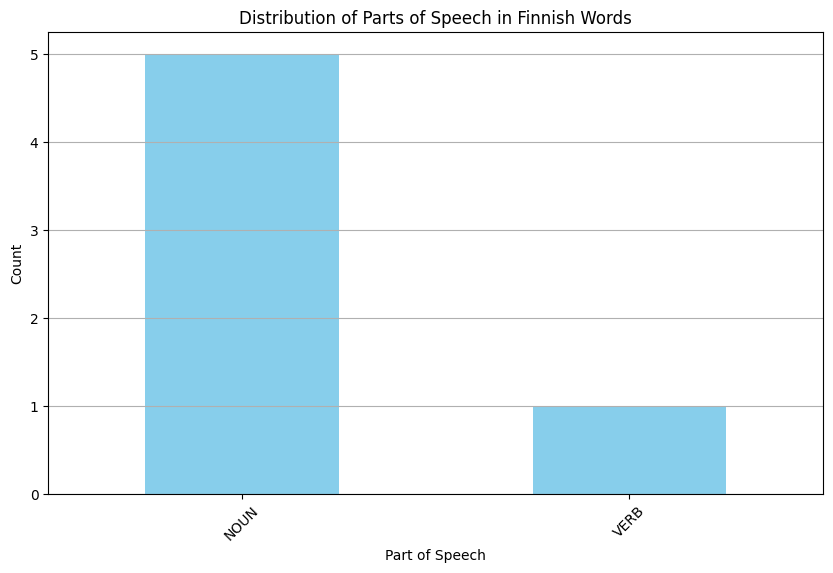

In [12]:
!pip install matplotlib pandas

# we will use pandas and matplotlib to create dataframes and plots
import pandas as pd
import matplotlib.pyplot as plt

# load the results into a pandas dataframe
df = pd.DataFrame(results)

#initialize a figure
plt.figure(figsize=(10, 6))
df['part_of_speech'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Parts of Speech in Finnish Words')
plt.xlabel('Part of Speech')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

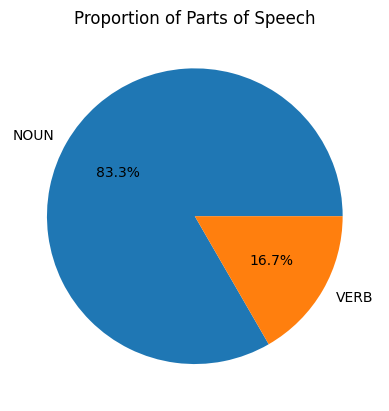

In [13]:
# maybe it is more effective to show it as a pie
df['part_of_speech'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Parts of Speech')
plt.ylabel('')
plt.show()

### Exercise 5: Morphological analysis
**Q1.** Choose another language and do an analysis like the one we did for finnish, for a text of your choice in both languages.

*How to start:*
1. SpaCy provides several pre-trained language models for various languages, each equipped with a morphological analyzer. Below is a list of examples of the available languages in SpaCy, along with their features regarding morphological analysis:

| Language    | Model             | Features                                                                                                  |
|-------------|-------------------|-----------------------------------------------------------------------------------------------------------|
| English     | `en_core_web_sm`  | POS tagging, lemmatization, dependency parsing, named entity recognition.                                 |
| German      | `de_core_news_md` | Strong morphological analysis due to complex inflections, including case and gender handling.             |
| Spanish     | `es_core_news_md` | Handles various verb conjugations, gendered nouns, and includes lemmatization.                            |
| French      | `fr_core_news_sm` | Supports conjugation of verbs, gendered nouns, and includes detailed morphological annotations.           |
| Italian     | `it_core_news_sm` | Handles noun and verb inflections, gender, and number, with strong morphological features.                |
| Dutch       | `nl_core_news_sm` | Provides morphological features for Dutch nouns and verbs, including inflection handling.                 |
| Portuguese  | `pt_core_news_sm` | Handles noun gender and number, as well as verb conjugation.                                              |
| Russian     | `ru_core_news_sm` | Supports rich morphological features due to the inflectional nature of Russian, including case and aspect.|
| Turkish     | `tr_core_news_sm` | Handles agglutination, allowing for complex morphological structures.                                     |
| Chinese     | `zh_core_web_sm`  | Tokenization and basic morphological analysis, given the language’s unique structure.                    |
| Czech       | `cs_core_news_sm` | Handles case, gender, and number in nouns and verbs.                                                     |

**if you run intro troubles while loading the models, go to [spacy](https://spacy.io/models/) and use the search tool in the website to look for the model in the language you are interested in.**

2.  Like you did at the end of Lab 1, upload a text for you to analyze.
A good text for morphological analysis should ideally contain a variety of words with rich inflectional and derivational morphology, as this will allow you to see how morphology affects the structure and meaning of words. For this exercise, choose a text of at most 750 words and perhaps no less than 250.

3. Translate the text into the other language and upload it into a second file (if the text is in Finnish, translate it to the language of your choice, and viceversa). You can do this yourself, find a translated version online or use a web tool for translation

4. you need to segment your texts it to be able to pass it to the SpaCy model.


In [1]:
# remember to download the model you want. something like:
!python -m spacy download en_core_web_sm
!python -m spacy download zh_core_web_sm
# !pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl

# !pip install https://github.com/explosion/spacy-models/releases/download/zh_core_web_sm-3.7.1/zh_core_web_sm-3.7.1-py3-none-any.whl

# !python -m spacy download es_core_web_md

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
  Using cached https://github.com/explosion/spacy-models/releases/download/zh_core_web_sm-3.7.0/zh_core_web_sm-3.7.0-py3-none-any.whl (48.5 MB)
✔ Download and installation successful
You can now load the package via spacy.load('zh_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
# your code here ... this is just a template to get you started
import spacy

# Load SpaCy models for the chosen languages
nlp_lang1 = spacy.load("en_core_web_sm")  # English model as an example
nlp_lang2 = spacy.load("zh_core_web_md")  # chinese model as an example

# Sample texts in the two languages... you need to load your both texts here:
text_lang1 = "The quick brown fox jumps over the lazy dog."
text_lang2 = "为解决在多场景（跨域、长时以及噪声干扰语音场景）下说话人确认系统性能较差的问题，提出了一种基于Conformer构建的、实时多场景鲁棒的说话人识别模型——PMS-Conformer。PMS-Conformer的设计灵感来自于先进的模型 MFA-Conformer。PMS-Conformer 对 MFA-Conformer 的声学特征提取器、网络组件和损失函数计算模块进行了改进，其具有新颖有效的声学特征提取器，以及鲁棒的、具有较强泛化能力的声纹嵌入码提取器。基于VoxCeleb1&2数据集实现了PMS-Conformer的训练；开展了PMS-Conformer与基线MFA-Conformer以及ECAPA-TDNN在说话人确认任务上的性能对比评估实验。实验结果表明在长语音SITW、跨域VoxMovies以及加噪处理的VoxCeleb-O测试集上，以PMS-Conformer构建的说话人确认系统的性能比用这两个基线构建的说话人确认系统更有竞争力；并且在声纹嵌入码提取器的可训练参数（Params）和推理速度（RTF）方面，PMS-Conformer 明显优于 ECAPA-TDNN。实验结果说明了PMS-Conformer在实时多场景下具有良好的性能。"


**Q2.** Write a short reflection answering the following questions:

- How does morphology shape the structure and meaning of sentences in each language?
- What challenges did you observe in analyzing morphology in one language versus the other?
- What insights did you gain about the nature of language through this morphological comparison?


**Expected Outputs for Q1 and Q2:**
- Analysis Tables for each language, showing token, lemma, POS tag, and morphological features.
- Visualization to compare morphological feature distributions.
- Written Reflection answering the questions above.

In [6]:
def analyze_Chinese_words(text_lang2):
    analysis_results = []

    doc = nlp_lang2(text_lang2)

    for token in doc:
      analysis_results.append({
                  'original_word': token.text,
                  'lemma': token.lemma_,
                  'part_of_speech': token.pos_,
                  'morphological_features': token.morph,
            })

    return analysis_results

# Run the morphological analysis
results2 = analyze_Chinese_words(text_lang2)

# Display the results
for result in results2:
    print(f"Original Word: {result['original_word']}")
    print(f"Lemma: {result['lemma']}")
    print(f"Part of Speech: {result['part_of_speech']}")
    print(f"Morphological Features: {result['morphological_features']}")
    print("---")

Original Word: 为
Lemma: 
Part of Speech: ADP
Morphological Features: 
---
Original Word: 解决
Lemma: 
Part of Speech: VERB
Morphological Features: 
---
Original Word: 在
Lemma: 
Part of Speech: ADP
Morphological Features: 
---
Original Word: 多
Lemma: 
Part of Speech: NUM
Morphological Features: 
---
Original Word: 场景
Lemma: 
Part of Speech: NOUN
Morphological Features: 
---
Original Word: （
Lemma: 
Part of Speech: PUNCT
Morphological Features: 
---
Original Word: 跨域
Lemma: 
Part of Speech: ADJ
Morphological Features: 
---
Original Word: 、
Lemma: 
Part of Speech: PUNCT
Morphological Features: 
---
Original Word: 长时
Lemma: 
Part of Speech: VERB
Morphological Features: 
---
Original Word: 以及
Lemma: 
Part of Speech: CCONJ
Morphological Features: 
---
Original Word: 噪声
Lemma: 
Part of Speech: NOUN
Morphological Features: 
---
Original Word: 干扰
Lemma: 
Part of Speech: VERB
Morphological Features: 
---
Original Word: 语音
Lemma: 
Part of Speech: NOUN
Morphological Features: 
---
Original Word: 场景
